<a href="https://colab.research.google.com/github/valentinaacruz/Personalized-Fashion-Recommendations/blob/main/Proyecto_Final_PP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto Final: H&M Personalized Recommendations**
# Paradigmas y Programación para Ciencia de Datos

## **Equipo:**


*   Isaac Monrroy Villegas
*   Ángel Noel Pérez Martínez
*   Valentina Ayelen Cruz Mendoza
*   Milena Fernanda Rivera Hernández



## **Importaciones necesarias:**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, log_loss, RocCurveDisplay
)

## **EDA**

### customers.csv

In [13]:
path = '/content/gdrive/MyDrive/Proyecto_Final_PPCD/datasets/customers.csv'
data_customers = pd.read_csv(path)
data_customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [14]:
print('Ultimas filas del dataset')
data_customers.tail() # son 1371980 datos

Ultimas filas del dataset


,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...
1371979,ffffd9ac14e89946416d80e791d064701994755c3ab686...,NaN,NaN,PRE-CREATE,NONE,65.0,0a1a03306fb2f62164c2a439b38c0caa64b40deaae8687...


In [15]:
print('Dimensiones del dataset:')
data_customers.shape

Dimensiones del dataset:


(1371980, 7)

In [16]:
data_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355969 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [17]:
print('Valores nulos por feature: ')
print(data_customers.isnull().sum())

Valores nulos por feature: 
customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16011
age                        15861
postal_code                    0
dtype: int64


In [18]:
data_customers.describe()

,FN,Active,age
count,476930.0,464404.0,1.356119e+06
mean,1.0,1.0,3.638696e+01
std,0.0,0.0,1.431363e+01
min,1.0,1.0,1.600000e+01
25%,1.0,1.0,2.400000e+01
50%,1.0,1.0,3.200000e+01
75%,1.0,1.0,4.900000e+01
max,1.0,1.0,9.900000e+01


In [19]:
# manejamos los nulos y mapeamos valores categoricos
data_customers['FN'] = data_customers['FN'].fillna(0)
data_customers['Active'] = data_customers['Active'].fillna(0)
data_customers['club_member_status'] = data_customers['club_member_status'].map({'LEFT CLUB': 3,'PRE-CREATE':2, 'ACTIVE': 1, 'NONE': 0}).fillna(0)
data_customers['fashion_news_frequency'] = data_customers['fashion_news_frequency'].map({'Monthly':2,'Regularly': 1, 'NONE': 0, 'None': 0}).fillna(0)
data_customers.tail()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.0,0.0,1.0,0.0,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.0,0.0,1.0,0.0,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,1.0,1.0,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,1.0,1.0,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...
1371979,ffffd9ac14e89946416d80e791d064701994755c3ab686...,0.0,0.0,2.0,0.0,65.0,0a1a03306fb2f62164c2a439b38c0caa64b40deaae8687...


In [20]:
print('Valores nulos por feature: ')
print(data_customers.isnull().sum())

Valores nulos por feature: 
customer_id                   0
FN                            0
Active                        0
club_member_status            0
fashion_news_frequency        0
age                       15861
postal_code                   0
dtype: int64


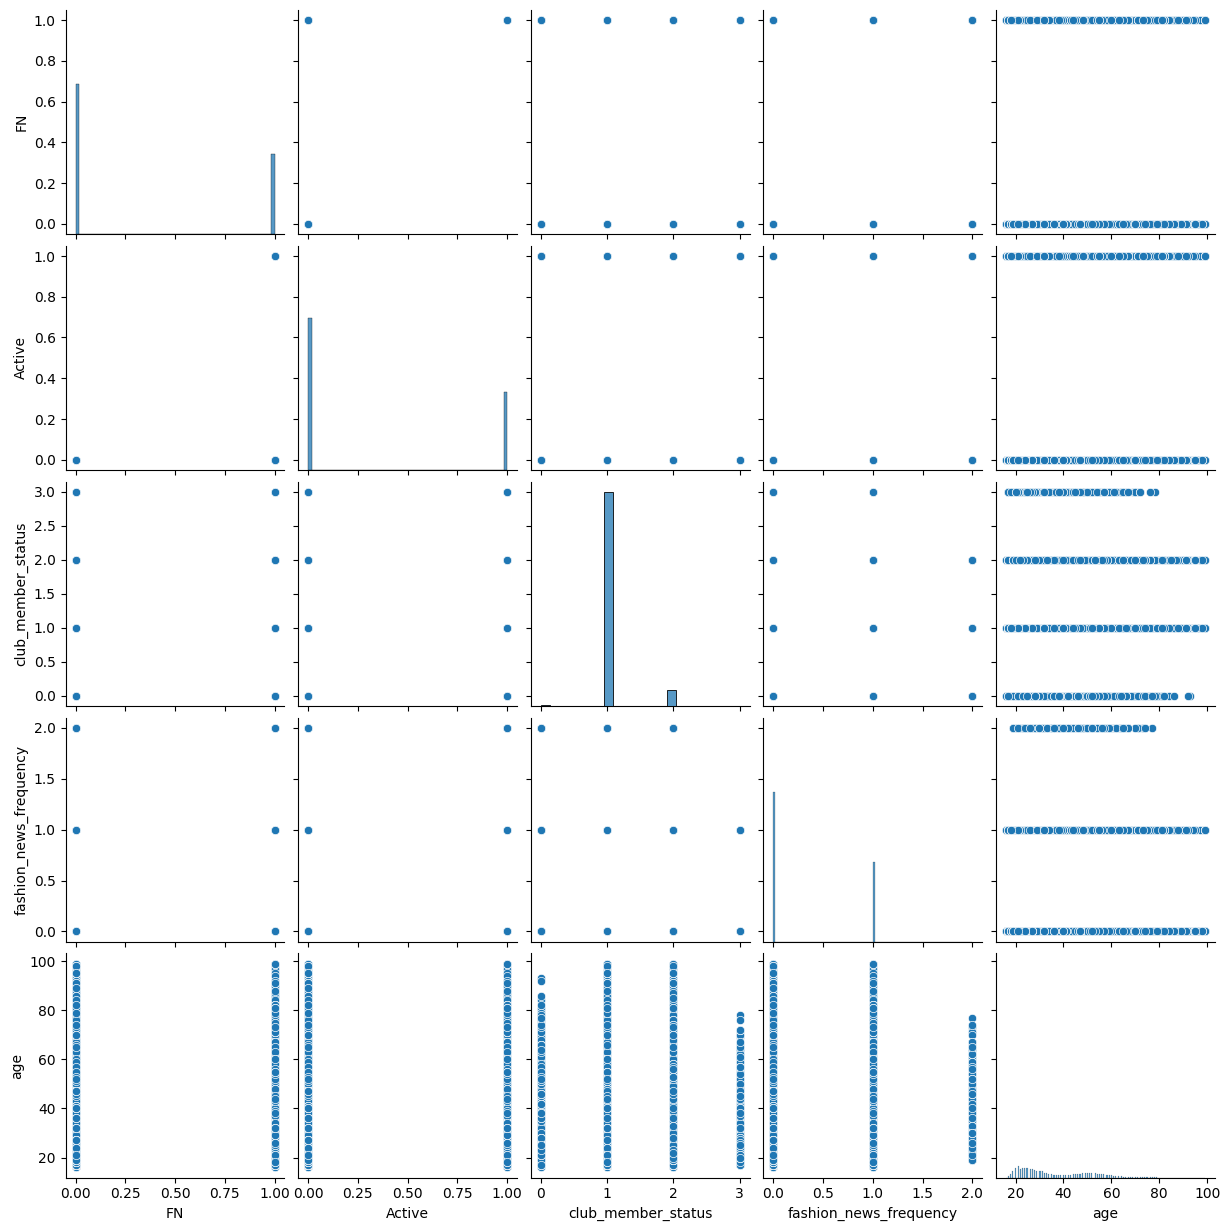

In [21]:
sns.pairplot(data_customers)

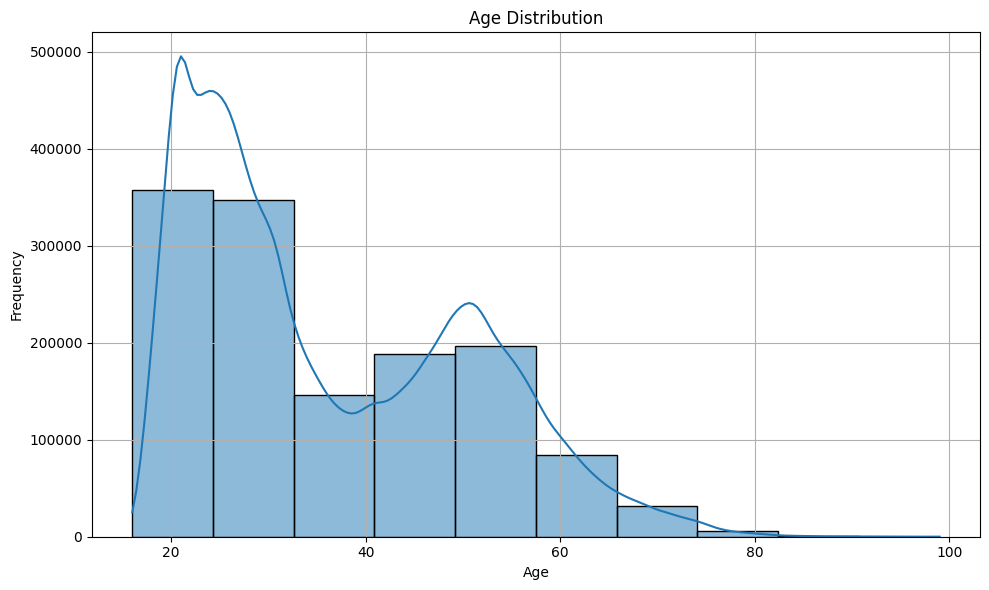

In [22]:
# Distribucion de edad
plt.figure(figsize=(10, 6))
sns.histplot(data_customers['age'], kde=True, bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()

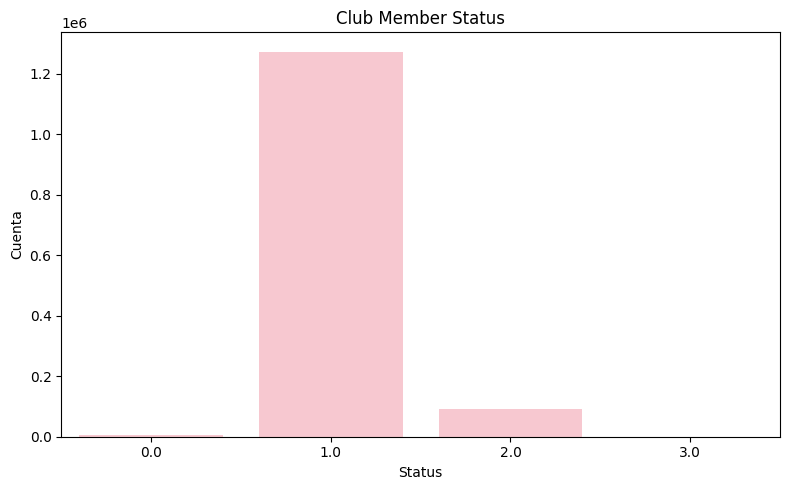

In [23]:
# Club Member Status
plt.figure(figsize=(8, 5))
sns.countplot(x='club_member_status', data=data_customers, color='pink')
plt.title('Club Member Status')
plt.xlabel('Status')
plt.ylabel('Cuenta')
plt.tight_layout()

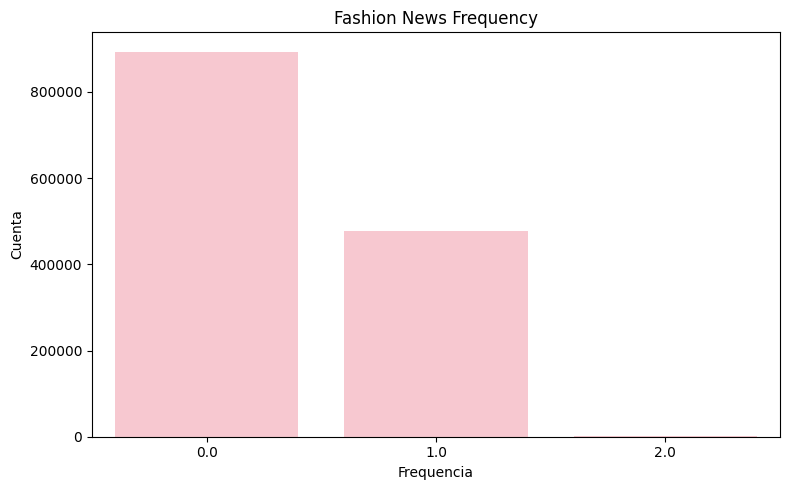

In [24]:
# Fashions News Frequency
plt.figure(figsize=(8, 5))
sns.countplot(x='fashion_news_frequency', data=data_customers, color='pink')
plt.title('Fashion News Frequency')
plt.xlabel('Frequencia')
plt.ylabel('Cuenta')
plt.tight_layout()
plt.tight_layout()

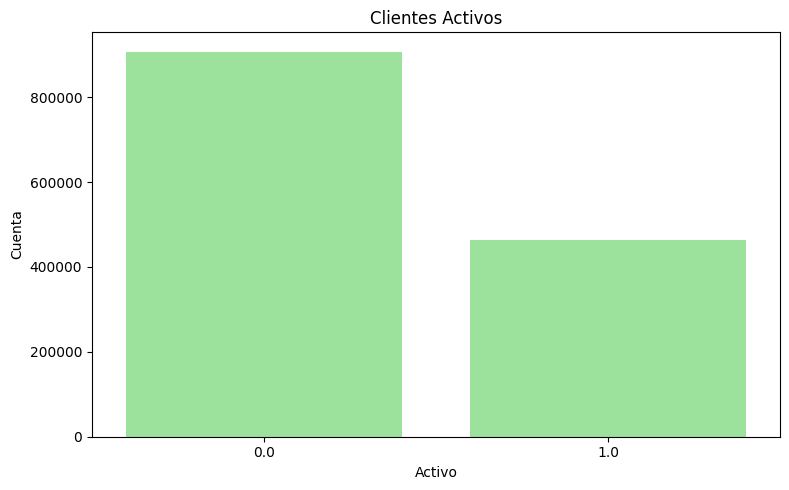

In [25]:
# Clientes Activos
plt.figure(figsize=(8, 5))
sns.countplot(x='Active', data=data_customers, color='lightgreen')
plt.title('Clientes Activos')
plt.xlabel('Activo')
plt.ylabel('Cuenta')
plt.tight_layout()
plt.tight_layout()

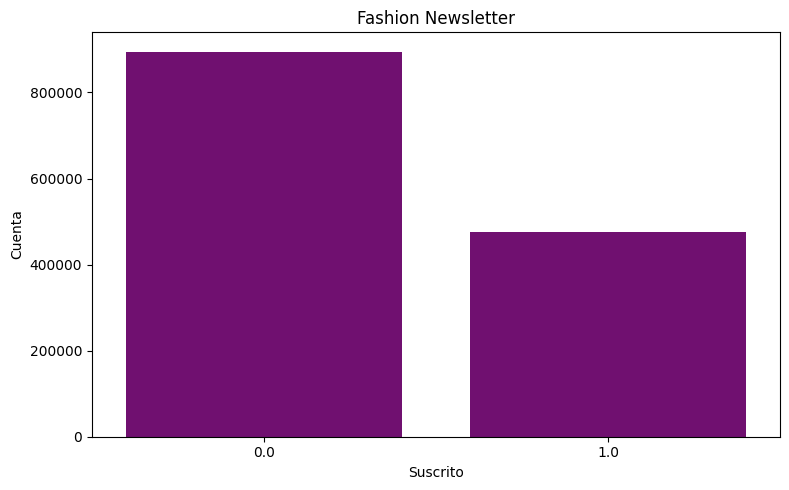

In [26]:
# Fashion Newsletter
plt.figure(figsize=(8, 5))
sns.countplot(x='FN', data=data_customers, color='purple')
plt.title('Fashion Newsletter')
plt.xlabel('Suscrito')
plt.ylabel('Cuenta')
plt.tight_layout()
plt.tight_layout()

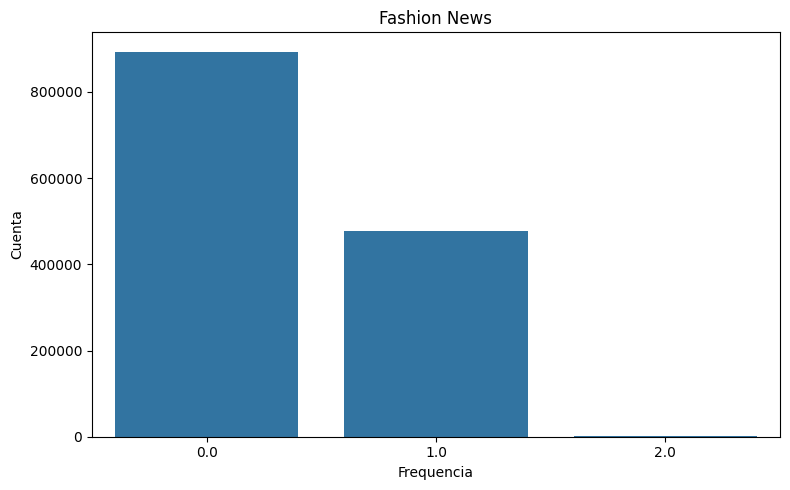

In [27]:
# Distribucion Fashion News Frequency
plt.figure(figsize=(8, 5))
sns.countplot(x='fashion_news_frequency', data=data_customers)
plt.title('Fashion News')
plt.xlabel('Frequencia')
plt.ylabel('Cuenta')
plt.tight_layout()

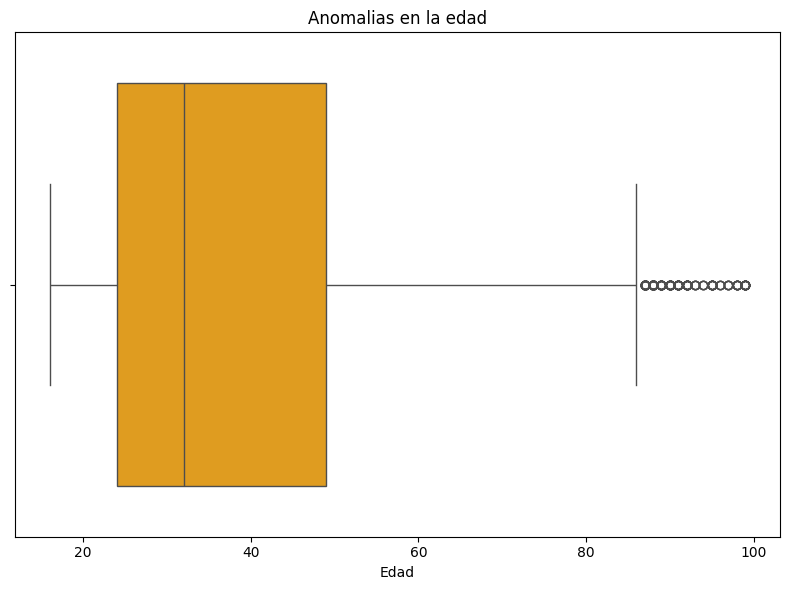

In [28]:
# Bigotes de la edad
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_customers['age'], color='orange')
plt.title('Anomalias en la edad')
plt.xlabel('Edad')
plt.tight_layout()

In [29]:
data_customers.describe()

,FN,Active,club_member_status,fashion_news_frequency,age
count,1.371980e+06,1.371980e+06,1.371980e+06,1.371980e+06,1.356119e+06
mean,3.476217e-01,3.384918e-01,1.064018e+00,3.492033e-01,3.638696e+01
std,4.762153e-01,4.731969e-01,2.635104e-01,4.780041e-01,1.431363e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.600000e+01
25%,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.400000e+01
50%,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,3.200000e+01
75%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.900000e+01
max,1.000000e+00,1.000000e+00,3.000000e+00,2.000000e+00,9.900000e+01


### articles.csv

In [30]:
path2 = '/content/gdrive/MyDrive/Proyecto_Final_PPCD/datasets/articles.csv'
data_articles = pd.read_csv(path2)
data_articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [31]:
data_articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [32]:
data_articles.dtypes

,0
article_id,int64
product_code,int64
prod_name,object
product_type_no,int64
product_type_name,object
product_group_name,object
graphical_appearance_no,int64
graphical_appearance_name,object
colour_group_code,int64
colour_group_name,object


In [33]:
cond=data_articles.article_id ==189654047
data_articles[cond]

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
192,189654047,189654,Raven skirt,275,Skirt,Garment Lower body,1010016,Solid,19,Greenish Khaki,...,Basic 1,D,Divided,2,Divided,51,Divided Basics,1002,Jersey Basic,Short jersey skirt with an elasticated waist.


In [34]:
data_articles.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [42]:
print('Número de filas, Número de columnas')
data_articles.shape

Número de filas, Número de columnas


(105542, 25)

In [36]:
len(data_articles)#Numero de filas

105542

In [37]:
print('Valores nulos')
data_articles.isnull().sum()

Valores nulos


,0
article_id,0
product_code,0
prod_name,0
product_type_no,0
product_type_name,0
product_group_name,0
graphical_appearance_no,0
graphical_appearance_name,0
colour_group_code,0
colour_group_name,0


/tmp/ipython-input-2328696896.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  prod_chart = sns.barplot(


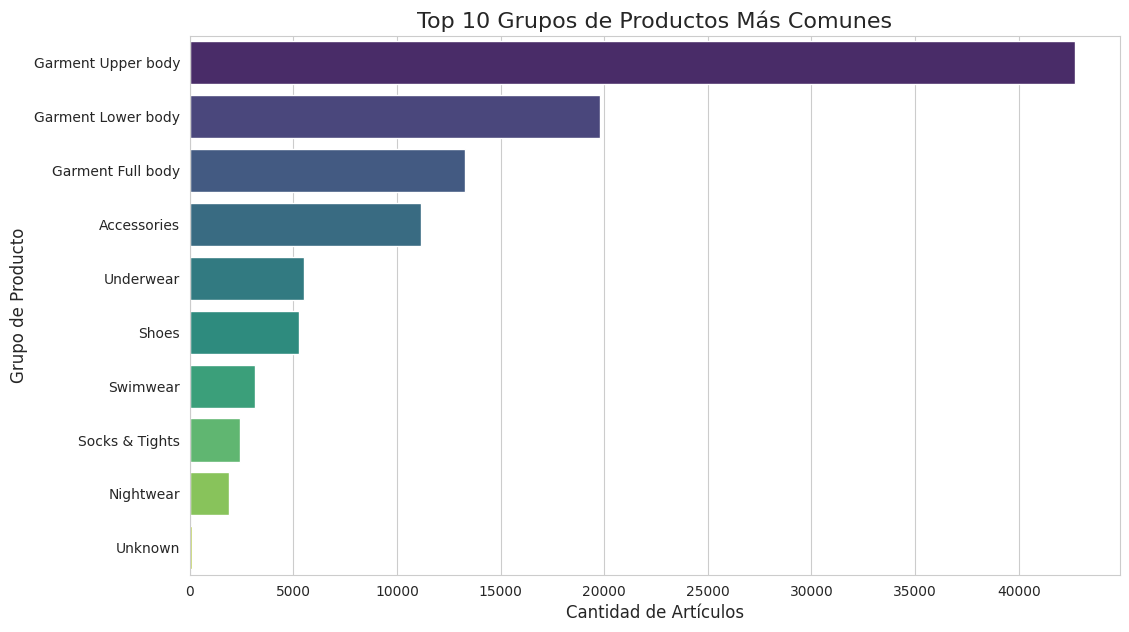

In [40]:
# Productos mas comunes
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))
top_10_product_groups = data_articles['product_group_name'].value_counts().nlargest(10)
prod_chart = sns.barplot(
    x=top_10_product_groups.values,
    y=top_10_product_groups.index,
    palette='viridis'
)
prod_chart.set_title('Top 10 Grupos de Productos Más Comunes', fontsize=16)
prod_chart.set_xlabel('Cantidad de Artículos', fontsize=12)
prod_chart.set_ylabel('Grupo de Producto', fontsize=12)
plt.show()

/tmp/ipython-input-2879000493.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  garment_chart = sns.barplot(


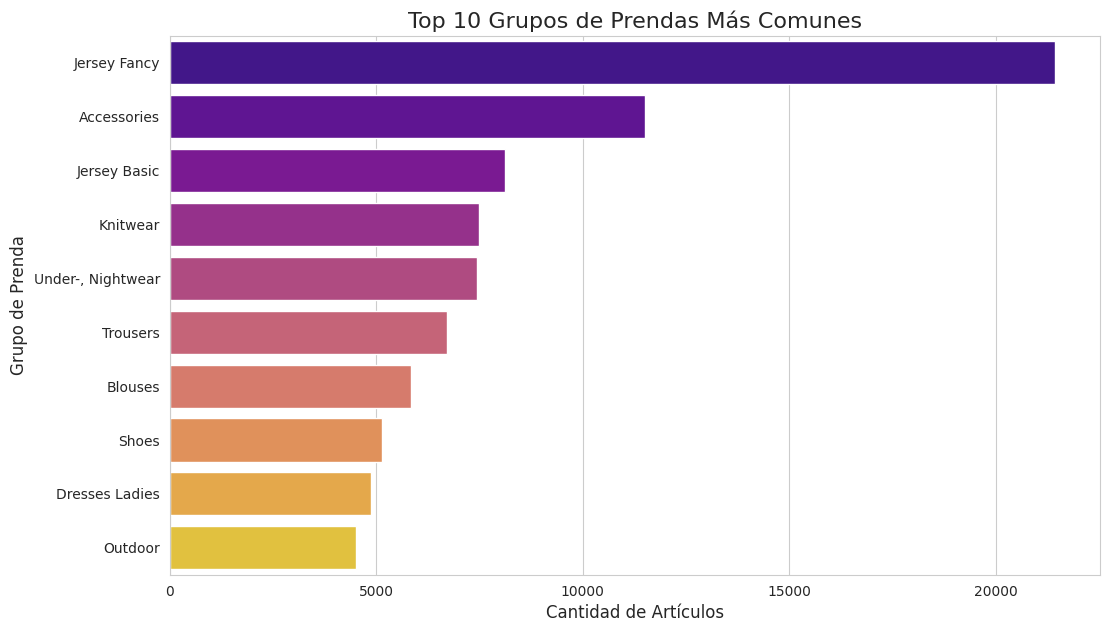

In [39]:
# Prendas mas comunes
plt.figure(figsize=(12, 7))
top_10_garment_groups = data_articles['garment_group_name'].value_counts().nlargest(10)
garment_chart = sns.barplot(
    x=top_10_garment_groups.values,
    y=top_10_garment_groups.index,
    palette='plasma'
)
garment_chart.set_title('Top 10 Grupos de Prendas Más Comunes', fontsize=16)
garment_chart.set_xlabel('Cantidad de Artículos', fontsize=12)
garment_chart.set_ylabel('Grupo de Prenda', fontsize=12)
plt.show()

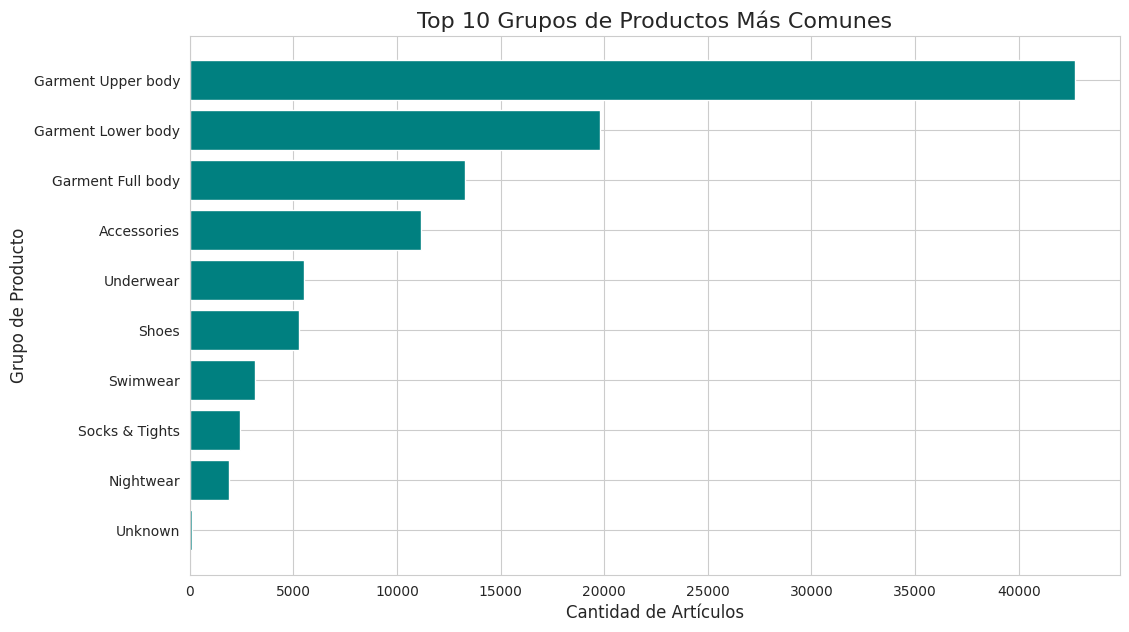

In [41]:
# Grupos de productos mas comunes
top_10_product_groups = data_articles['product_group_name'].value_counts().nlargest(10)
fig, ax = plt.subplots(figsize=(12, 7))
ax.barh(top_10_product_groups.index, top_10_product_groups.values, color='teal')
ax.invert_yaxis()
ax.set_title('Top 10 Grupos de Productos Más Comunes', fontsize=16)
ax.set_xlabel('Cantidad de Artículos', fontsize=12)
ax.set_ylabel('Grupo de Producto', fontsize=12)
plt.show()

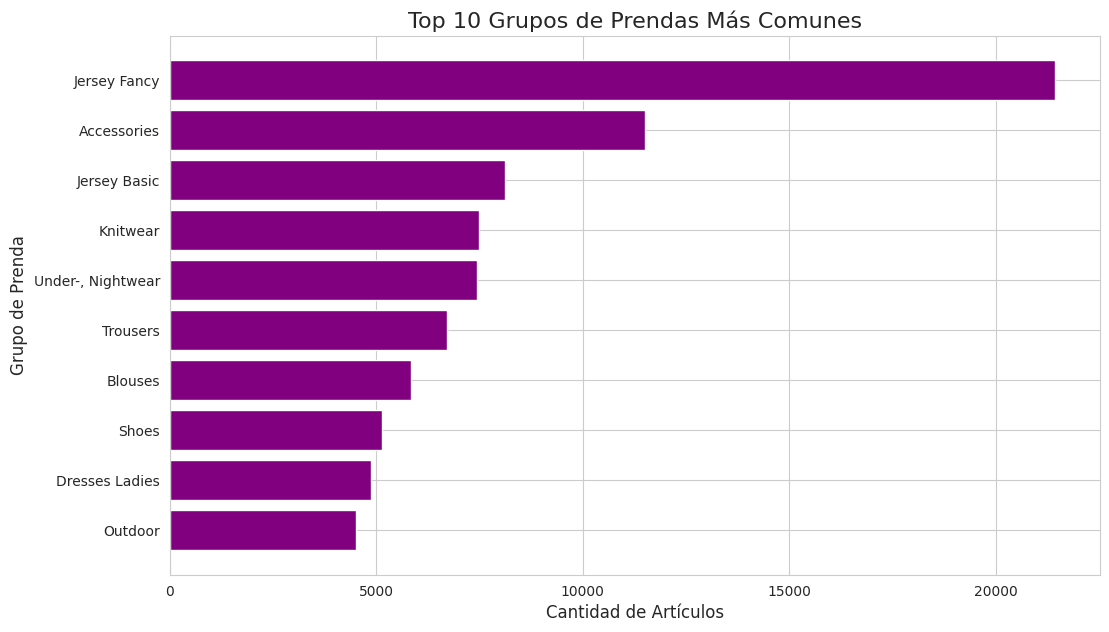

In [43]:
# Grupo de Prendas mas comunes
top_10_garment_groups = data_articles['garment_group_name'].value_counts().nlargest(10)
fig, ax = plt.subplots(figsize=(12, 7))
ax.barh(top_10_garment_groups.index, top_10_garment_groups.values, color='purple')
ax.invert_yaxis()
ax.set_title('Top 10 Grupos de Prendas Más Comunes', fontsize=16)
ax.set_xlabel('Cantidad de Artículos', fontsize=12)
ax.set_ylabel('Grupo de Prenda', fontsize=12)
plt.show()

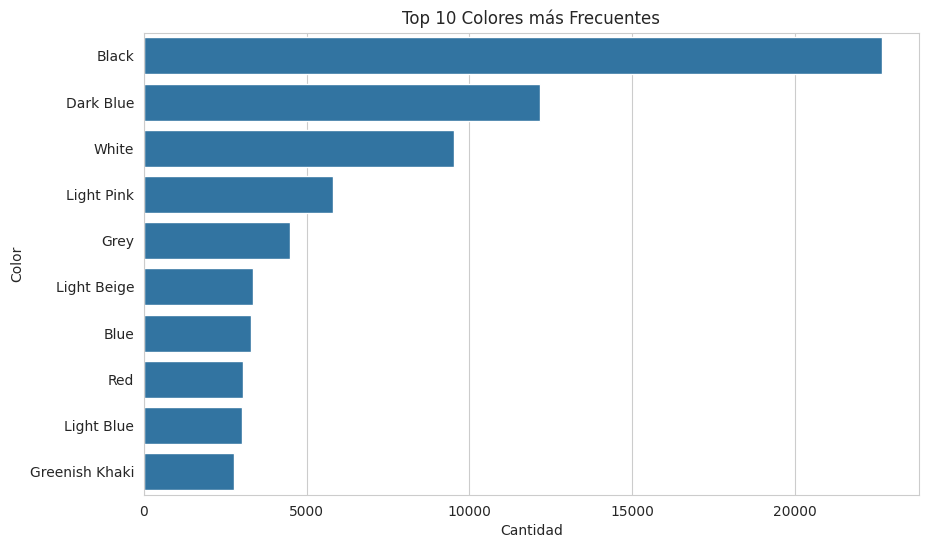

In [45]:
# Top 10 colores más comunes
plt.figure(figsize=(10, 6))
sns.countplot(y=data_articles['colour_group_name'], order=data_articles['colour_group_name'].value_counts().index[:10])
plt.title('Top 10 Colores más Frecuentes')
plt.xlabel('Cantidad')
plt.ylabel('Color')
plt.show()

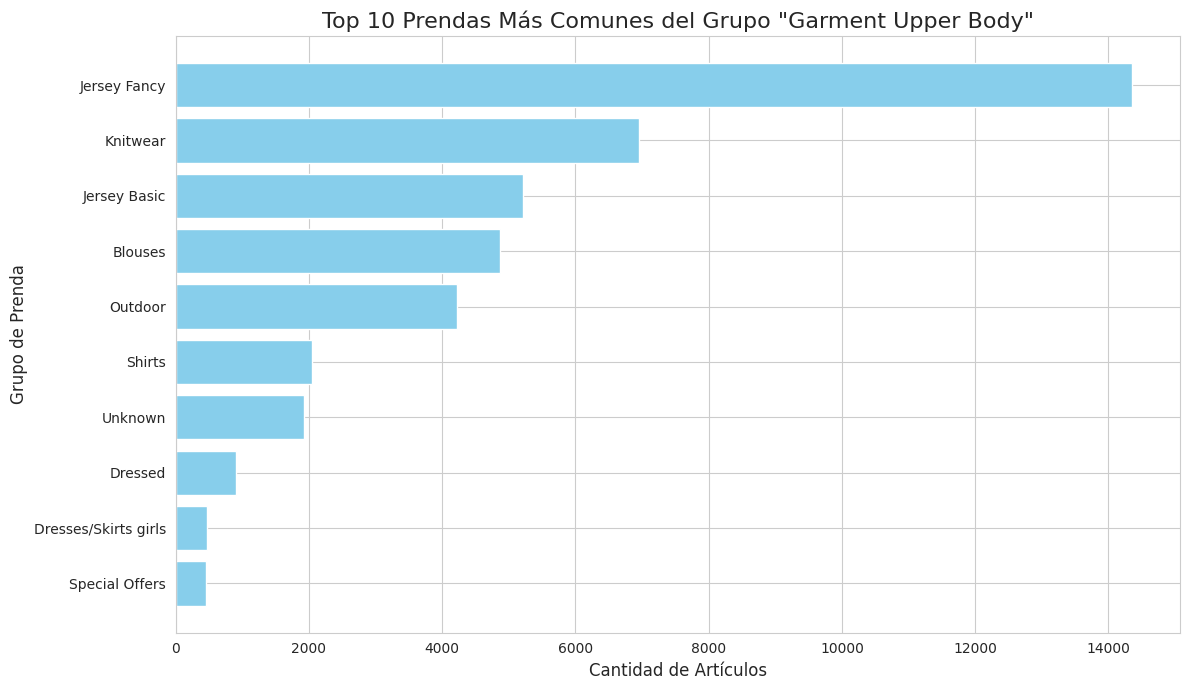

In [46]:
# Prendas mas comunes de grupo del Grupo "Garment Upper Body"
upper_body_df = data_articles[data_articles['product_group_name'] == 'Garment Upper body']
top_10_upper_body = upper_body_df['garment_group_name'].value_counts().nlargest(10)
fig, ax = plt.subplots(figsize=(12, 7))
ax.barh(top_10_upper_body.index, top_10_upper_body.values, color='skyblue')
ax.invert_yaxis()
ax.set_title('Top 10 Prendas Más Comunes del Grupo "Garment Upper Body"', fontsize=16)
ax.set_xlabel('Cantidad de Artículos', fontsize=12)
ax.set_ylabel('Grupo de Prenda', fontsize=12)
plt.tight_layout()
plt.show()

### transactions_train.csv


In [49]:
transactions_data = pd.read_csv('/content/gdrive/MyDrive/Proyecto_Final_PPCD/datasets/transactions_train.csv')
transactions_data.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [50]:
transactions_data.size

158941620

In [51]:
transactions_data.shape

(31788324, 5)

In [53]:
transactions_data.dtypes

,0
t_dat,object
customer_id,object
article_id,int64
price,float64
sales_channel_id,int64


In [54]:
transactions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


In [55]:
transactions_data.describe()

,article_id,price,sales_channel_id
count,3.178832e+07,3.178832e+07,3.178832e+07
mean,6.962272e+08,2.782927e-02,1.704028e+00
std,1.334480e+08,1.918113e-02,4.564786e-01
min,1.087750e+08,1.694915e-05,1.000000e+00
25%,6.328030e+08,1.581356e-02,1.000000e+00
50%,7.145820e+08,2.540678e-02,2.000000e+00
75%,7.865240e+08,3.388136e-02,2.000000e+00
max,9.562170e+08,5.915254e-01,2.000000e+00


In [56]:
transactions_data.values

array([['2018-09-20',
        '000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318',
        663713001, 0.0508305084745762, 2],
       ['2018-09-20',
        '000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318',
        541518023, 0.0304915254237288, 2],
       ['2018-09-20',
        '00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2',
        505221004, 0.0152372881355932, 2],
       ...,
       ['2020-09-22',
        'fff380805474b287b05cb2a7507b9a013482f7dd0bce0e6936f26ea7ecaa68a1',
        918325001, 0.0432033898305084, 1],
       ['2020-09-22',
        'fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e593881ae6007d775f0f',
        833459002, 0.0067627118644067, 1],
       ['2020-09-22',
        'fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20e02ce5d1e58a8f700b',
        898573003, 0.0338813559322033, 2]], dtype=object)

In [57]:
transactions_data.columns

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id'], dtype='object')

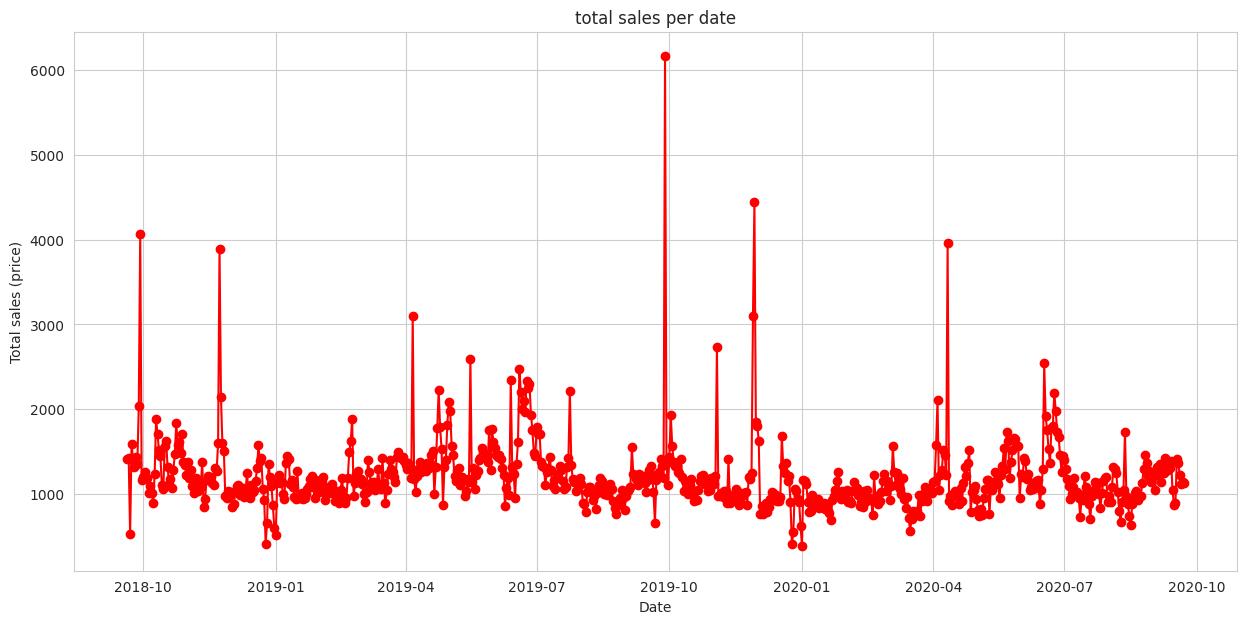

In [66]:
transactions_data['t_dat'] = pd.to_datetime(transactions_data['t_dat'])
sales_per_date = transactions_data.groupby('t_dat')['price'].sum()
plt.figure(figsize=(15,7))
plt.plot(sales_per_date.index, sales_per_date.values, marker = 'o', linestyle = '-', color='red')
plt.title("total sales per date")
plt.xlabel('Date')
plt.ylabel('Total sales (price)')
plt.show()

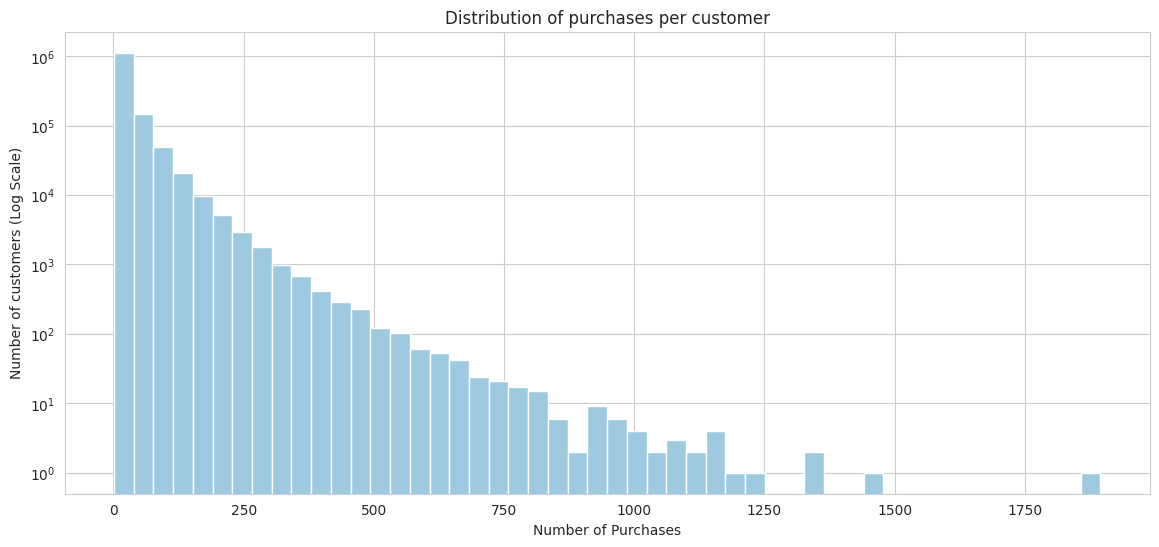

In [62]:
customer_purchase_counts = transactions_data['customer_id'].value_counts()
plt.figure(figsize=(14, 6))
plt.hist(customer_purchase_counts.values, bins=50, color='#9ecae1', log=True)
plt.title('Distribution of purchases per customer')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of customers (Log Scale)')
plt.show()

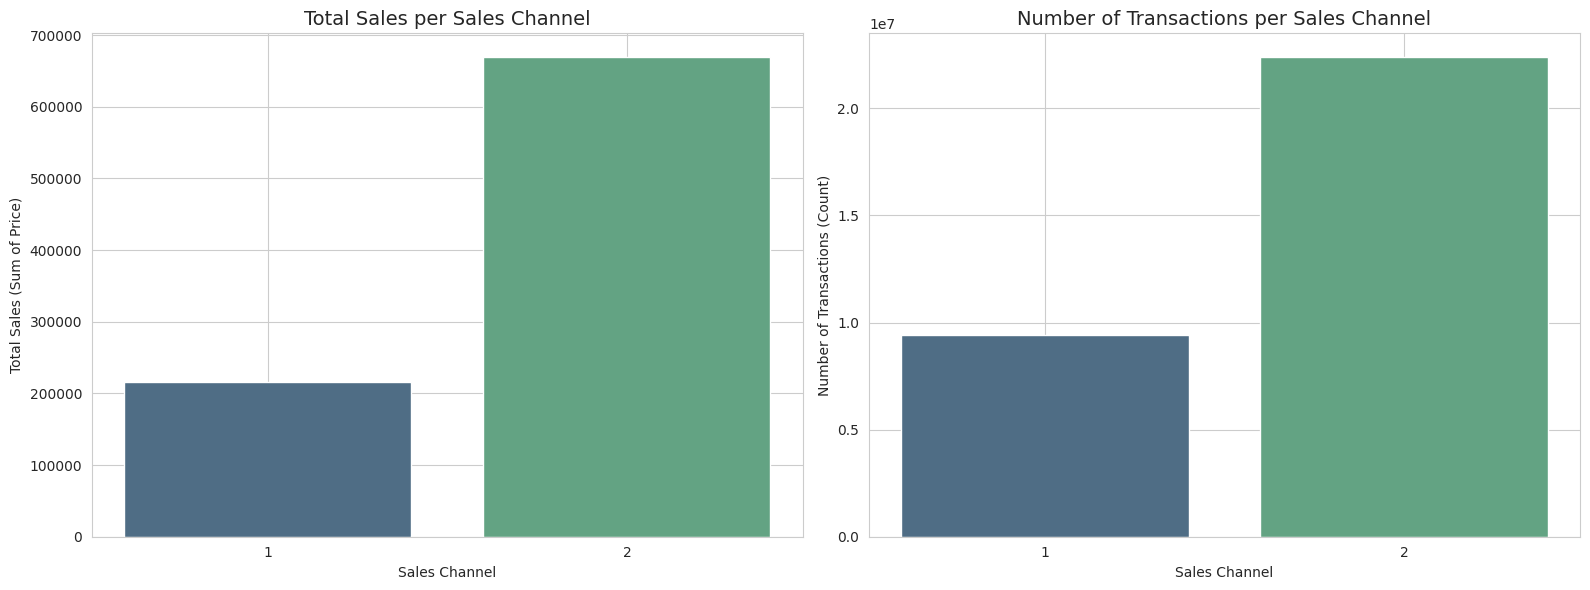

In [64]:
# Gráfica Izquierda: Suma total de precios por canal
sales_by_channel = transactions_data.groupby('sales_channel_id')['price'].sum()

# Gráfica Derecha: Conteo total de transacciones por canal
transactions_by_channel = transactions_data['sales_channel_id'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
colors = ['#4f6d85', '#63a383']
axes[0].bar(sales_by_channel.index, sales_by_channel.values, color=colors)
axes[0].set_title('Total Sales per Sales Channel', fontsize=14)
axes[0].set_xlabel('Sales Channel')
axes[0].set_ylabel('Total Sales (Sum of Price)')
axes[0].set_xticks([1, 2])
axes[1].bar(transactions_by_channel.index, transactions_by_channel.values, color=colors)
axes[1].set_title('Number of Transactions per Sales Channel', fontsize=14)
axes[1].set_xlabel('Sales Channel')
axes[1].set_ylabel('Number of Transactions (Count)')
axes[1].set_xticks([1, 2])
plt.tight_layout()
plt.show()

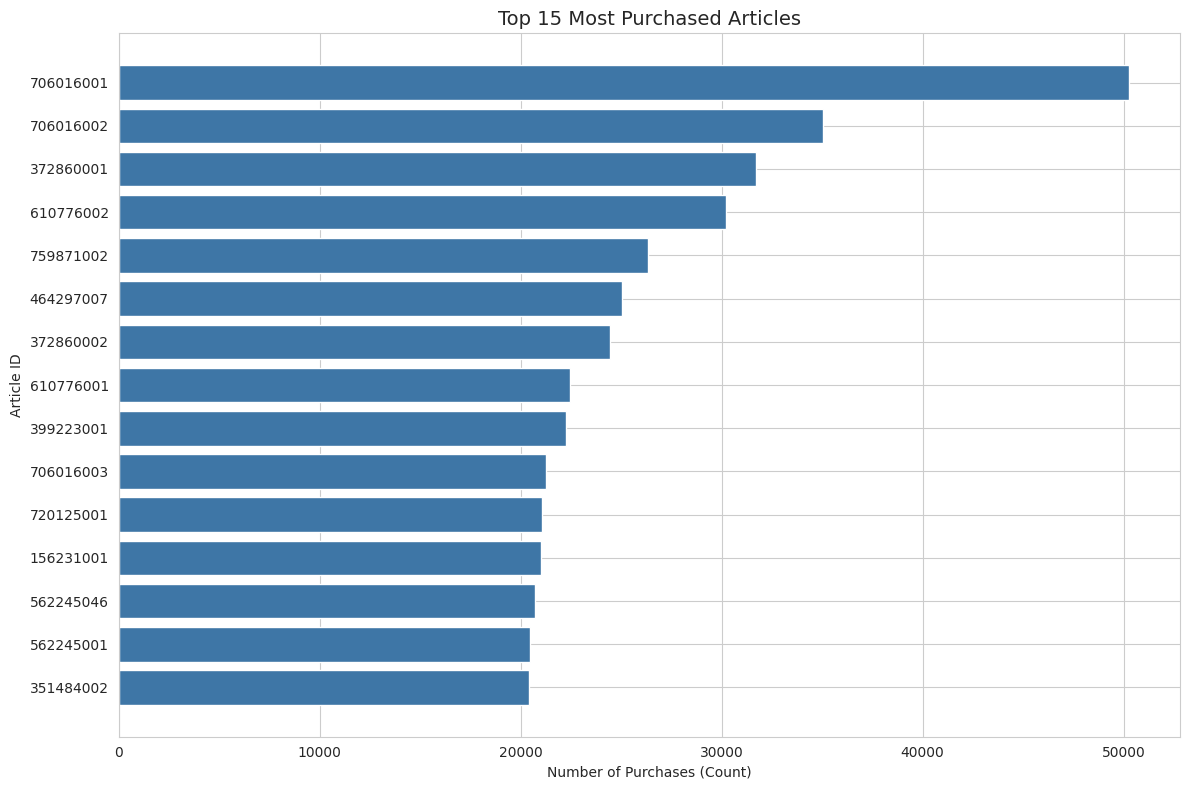

In [65]:
top_articles = transactions_data['article_id'].value_counts().head(15)
top_articles_sorted = top_articles.sort_values(ascending=True)
plt.figure(figsize=(12, 8))
plt.barh(top_articles_sorted.index.astype(str),
         top_articles_sorted.values,
         color='#3e76a6')
plt.title('Top 15 Most Purchased Articles', fontsize=14)
plt.xlabel('Number of Purchases (Count)')
plt.ylabel('Article ID')
plt.tight_layout()
plt.show()

### sample_submission.csv

In [47]:
data_ss = pd.read_csv('/content/gdrive/MyDrive/Proyecto_Final_PPCD/datasets/sample_submission.csv')
data_ss.head()

,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0706016001 0706016002 0372860001 0610776002 07...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0706016001 0706016002 0372860001 0610776002 07...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0706016001 0706016002 0372860001 0610776002 07...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0706016001 0706016002 0372860001 0610776002 07...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0706016001 0706016002 0372860001 0610776002 07...


# Preprocesamiento

In [ ]:
# noel

## Entrenamiento

### Regresión Lineal

In [ ]:
# val

### XGBoost

In [ ]:
# isaac

### Naive Bayes

In [ ]:
# X_train = ...
# y_train = ...

# Definimos una pipline para automatizar la aplicacion del modelo
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('naive_bayes', GaussianNB())
])

# Utilizamos una busqueda de malla (Grid Search) para encontrar los mejores
# parametros
param_grid = {
    'naive_bayes__var_smoothing': np.logspace(0, -9, num=20)
}
# Utilizamos Validacion Cruzada KFold con shuffle=False.
cv_strategy = KFold(n_splits=5, shuffle=False)

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=cv_strategy,
    verbose=1,
    n_jobs=-1
)

#
# grid_search.fit(X_train, y_train)

# print(f"Mejores parámetros: {grid_search.best_params_}")
# best_model = grid_search.best_estimator_
# print(f"Mejor score (ROC AUC) en validación cruzada: {grid_search.best_score_:.4f}")

## Prueba

### Regresión Lineal

### XGBoost

### Naive bayes

In [ ]:
# y_pred_xgb = best_model.predict(X_test)

# Nos interesa la columna [1] que es la probabilidad de "Compra"
# y_prob = best_model.predict_proba(X_test)[:, 1]

## Rendimiento

### Regresión Lineal

### XGBoost

### Naive Bayes

In [ ]:
# Calculo de metricas
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
ll = log_loss(y_test, y_prob)

# Resultados
print(f"Accuracy (Exactitud) : {acc:.4f}")
print(f"Precision            : {prec:.4f}") # (De los que predijo compra, ¿cuantos compraron?)
print(f"Recall (Sensibilidad): {rec:.4f}") # (De los que compraron, ¿cuántos detecto?)
print(f"F1 Score             : {f1:.4f}") # (Media armónica entre Precision y Recall)
print(f"ROC AUC Score        : {auc:.4f}") # (Capacidad de ranking)
print(f"Log Loss             : {ll:.4f}") # (Que tan "seguro" está el modelo)

# Curva ROC
fig, ax = plt.subplots(figsize=(8, 6))
RocCurveDisplay.from_predictions(
    y_test,
    y_prob,
    name="Naive Bayes",
    ax=ax,
    plot_chance_level=True
)
ax.set_title("Curva ROC - Probabilidad de Compra")
plt.show()